In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mammals = pd.read_csv('data/mammals.txt', sep='\t', names=['brain', 'body'], header=0)
mammals.head()

,brain,body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [3]:
# Just for today, let's drop some of the larger values.
# Of course irl you don't just randomly do this. This is
# only for example.
mammals = mammals[mammals.body < 200]
mammals.shape

(51, 2)

### At a glance: How are our LINE assumptions here?

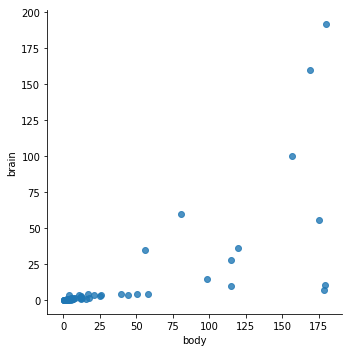

In [4]:
# ci=False      --> Don't show confidence band
# fit_reg=False --> Don't show regression line
sns.lmplot(x='body', y='brain', data=mammals, ci=False, fit_reg=False);

### Let's Avenger's Infinity War our dataset

In [5]:
# Randomly assign every observation to either universe 1 or universe 2.
np.random.seed(12345)
mammals['universe'] = np.random.randint(1, 3, len(mammals))
mammals.head()

,brain,body,universe
0,3.385,44.5,1
1,0.480,15.5,2
2,1.350,8.1,2
4,36.330,119.5,2
5,27.660,115.0,1


### How are Bias and Variance here?

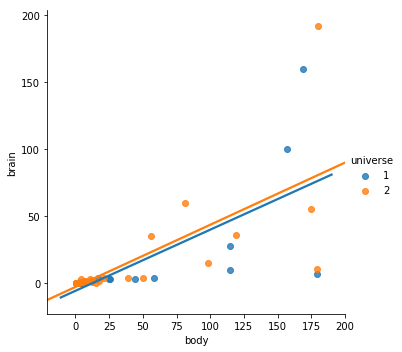

In [9]:
# Also try hue='universe'
sns.lmplot(x='body', y='brain', data=mammals, hue='universe', ci=False);

### Let's DO IT LIVE!
Let's play with the `order=k` parameter and find a good bias-var tradeoff. Maybe let's make a function using `**kwargs` to speed this up?

In [13]:
import warnings
warnings.filterwarnings("ignore")

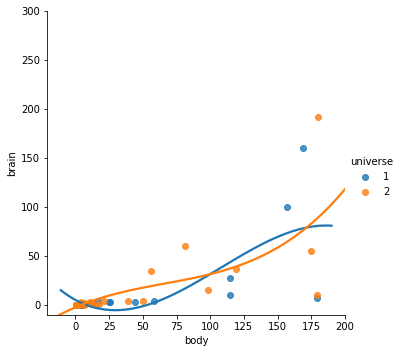

In [22]:
sns.lmplot(x="body", y="brain", data=mammals, ci=False, hue="universe", order=3)
plt.ylim(-10, 300);

In [25]:
mammals["log_body"] = np.log(mammals["body"])
mammals["log_brain"] = np.log(mammals["brain"])

In [27]:
mammals.head()

,brain,body,universe,log_body,log_brain
0,3.385,44.5,1,3.795489,1.219354
1,0.480,15.5,2,2.740840,-0.733969
2,1.350,8.1,2,2.091864,0.300105
4,36.330,119.5,2,4.783316,3.592644
5,27.660,115.0,1,4.744932,3.319987


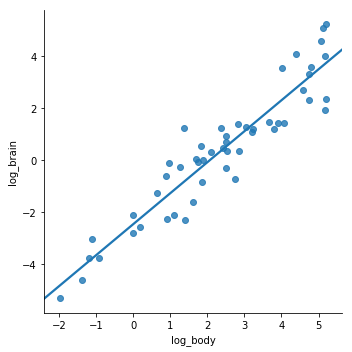

In [28]:
sns.lmplot(x="log_body", y="log_brain", data=mammals, ci=False)